# Plotting with Matplotlib and Seaborn

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import biopsykit as bp
import biopsykit.saliva as saliva

%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
plt.close('all')

## Matplotlib

Importing the `pyplot` interface from Matplotlib:  
`import matplotlib.pyplot as plt`

`pyplot`: procedural interface of the object-oriented plot library of Matplotlib. The commands of `pyplot` are chosen to be similar to *MATLAB* in both: their names and their arguments.

In order to display Matplotlib plots inside the notebook, and to interact with them (zooming, etc.), you need to enable the JupyterLab Matplotlib widget:  
`%matplotlib widget`

### Introduction

A plot consists of a `figure` (e.g. a window, a Jupyter widget, etc.) with one or more `axes` (an area in which data are plotted).

Usage Guide: https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

*Matplotlib* supports both an *object-oriented* as well as an *imperative* syntax for plotting. The imperative syntax was deliberately designed to be very similar to the *MATLAB* syntax and works on the global `plt` module ("state machine"). The object-oriented syntax is very similar to the imperative syntax, but unlike the imperative syntax it works on `Figure` and `Axes` objects that belong to the respective plot.

<div class="alert alert-block alert-info">
    <b>Note:</b> The object-oriented syntax is usually more intuitive to use, since the plot functions have an effect on a specific object and not on the global <code>plt</code> module.
</div>

In [3]:
x = np.arange(0, 2, 0.01)
y = np.sin(4 * np.pi * x)

#### Imperative syntax

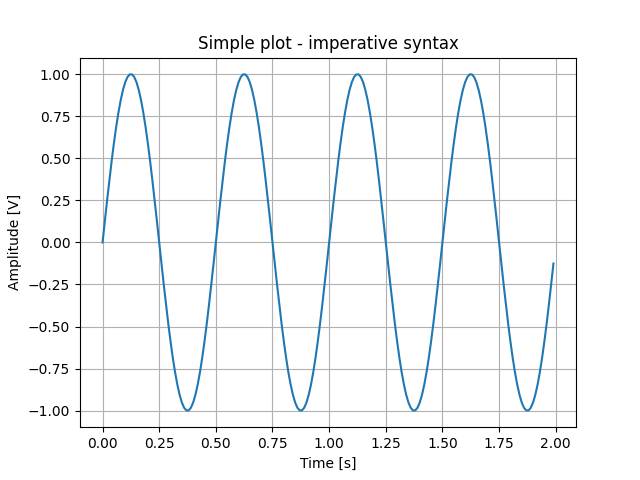

In [4]:
plt.figure() # Creating a new figure
plt.plot(x, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.title('Simple plot - imperative syntax')
plt.grid(True)

#### Object-oriented syntax

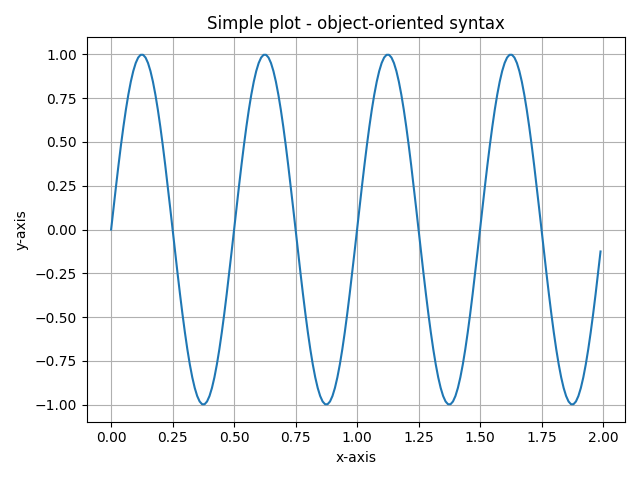

In [5]:
fig, ax = plt.subplots() # Creating a Figure object and associated Axes
ax.plot(x, y)
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_title("Simple plot - object-oriented syntax")
ax.grid(True)

fig.tight_layout()

<div class="alert alert-block alert-info">
    <b>Note:</b> When the warning
    <p><code>RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (matplotlib.pyplot.figure) are retained until explicitly closed and may consume too much memory.</code></p>
    appears, it simply means that during the execution of the notebook more and more new figures were created (e.g. by always calling <code>plt.figure()</code> or <code>plt.subplots()</code>). By calling <code>plt.close('all')</code> once (which is placed e.g. at the beginning of the notebook in the cell where external libraries are also imported) one closes all Figures opened in the background.
</div>

### Simple plots

Loading data and calculating mean value per group:

In [6]:
data = pd.read_csv('data/cortisol_sample.csv', index_col='subject')
data_mean = data.groupby('condition').mean()
data_mean

,0,1,2,3,4,5,6
condition,,,,,,,
Control,5.745986,6.001982,5.966889,7.662025,7.666218,6.949896,5.923121
Intervention,5.786675,5.752271,4.882504,5.140364,5.223514,4.970175,4.655104


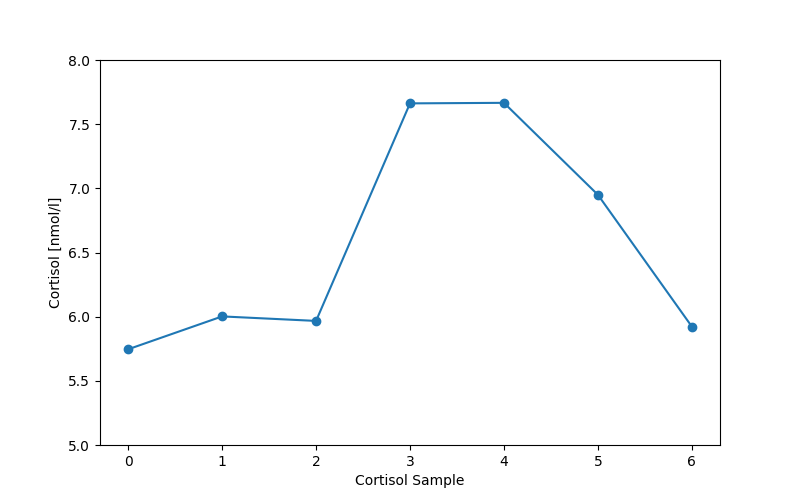

In [7]:
#fig, ax = plt.subplots() # Creating a Figure and associated Axes
fig, ax = plt.subplots(figsize=(8, 5)) # Specifying the size of the figure (and aspect ratio)
ax.plot(data_mean.xs('Control'), 'o-') # Plotting the control group. Here: 'o-' to plot line and marker of the data.
ax.set_xlabel("Cortisol Sample") # Title of the x-axis
ax.set_ylabel("Cortisol [nmol/l]") # Title of the y-axis
ax.set_ylim([5, 8]) # y-axis limit
ax.tick_params(bottom=True, left=True) # Activating the ticks of the x and y axes

Multiple lines in one Axes:

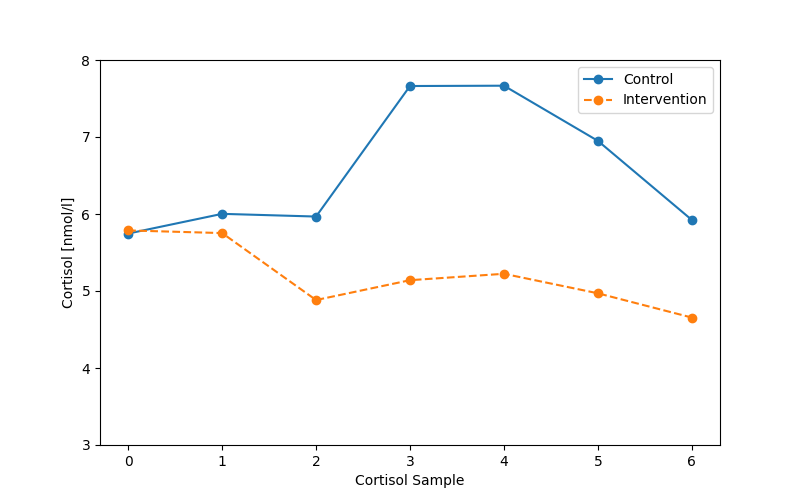

In [8]:
fig, ax = plt.subplots(figsize=(8, 5)) # Specifying the size of the figure (and aspect ratio)
ax.plot(data_mean.xs('Control'), 'o-', label="Control") # Plotting the control group
ax.plot(data_mean.xs('Intervention'), 'o--', label="Intervention") # Plotting the intervention group; -- = dashed line
ax.set_xlabel("Cortisol Sample") # Title of the x-axis
ax.set_ylabel("Cortisol [nmol/l]") # Title of the y-axis
ax.set_ylim([3, 8]) # y-axis limit
ax.tick_params(bottom=True, left=True) # Activating ticks of the x and y axes
ax.legend() # Legend to distinguish between the two groups

### Multiple *subplots* in one *figure*

`plt.subplots` can also create multiple *axes* in one *figure* and place them in a grid (parameters: `nrows` or `ncols`). Instead of a *figure* and an *axes* object, the function now returns a *figure* and an array of *axes*:

<class 'numpy.ndarray'>
2


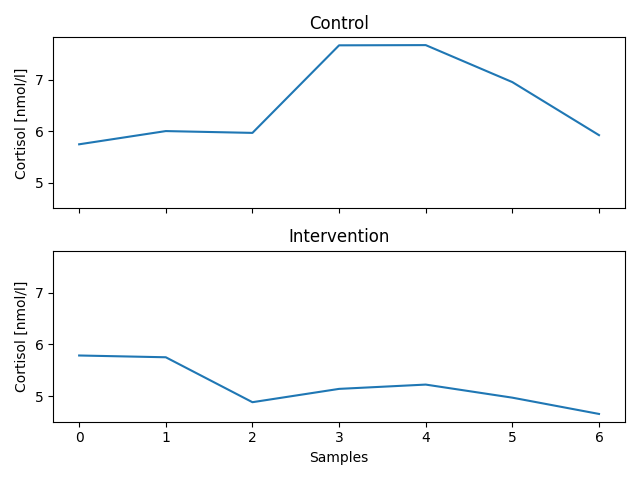

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
print(type(axs))
print(len(axs))
axs[0].plot(data_mean.xs('Control'))
axs[0].set_title('Control')
axs[0].set_ylabel('Cortisol [nmol/l]')
axs[1].plot(data_mean.xs('Intervention'))
axs[1].set_title('Intervention')
axs[1].set_ylabel('Cortisol [nmol/l]')
axs[1].set_xlabel('Samples')
fig.tight_layout() # tight_layout() adjusts distances between subplots, axis labels etc. at the end of plotting

### Using the `plot` method of DataFrames
Panda's DataFrames (and also GroupBy objects) have a `plot` method that can be called directly. The index becomes the x-axis, the columns the y-axis.

In [10]:
data_mean.T

condition,Control,Intervention
0,5.745986,5.786675
1,6.001982,5.752271
2,5.966889,4.882504
3,7.662025,5.140364
4,7.666218,5.223514
5,6.949896,4.970175
6,5.923121,4.655104


Transpose the data frame so the samples become the index (-> x-axis) and the groups become columns (-> y-axis).
`plot()` returns an `axes` object (or an array of `axes` objects) which can be used for further processing.

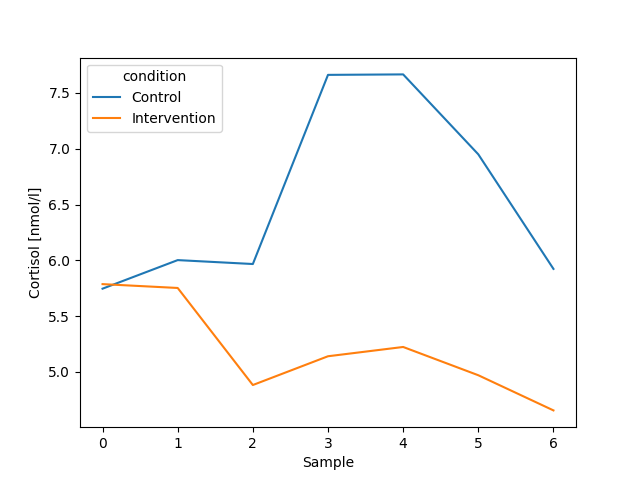

In [11]:
ax = data_mean.T.plot()
# other operations on the axes object
ax.set_xlabel("Sample")
ax.set_ylabel("Cortisol [nmol/l]")
ax.tick_params(bottom=True, left=True) # Activate ticks of the x and y axes

You can also pass an already created `axes` object to the `plot()` method, which will then be plotted into:

<Axes: >

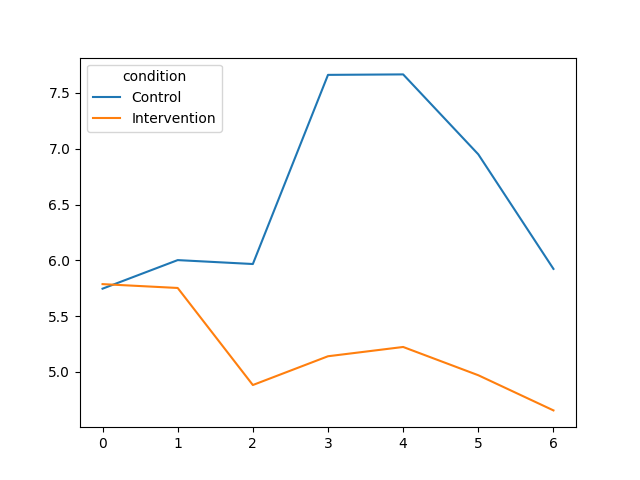

In [12]:
fig, ax = plt.subplots()
data_mean.T.plot(ax=ax)
# further operations...

Configuration of the `plot()` method:

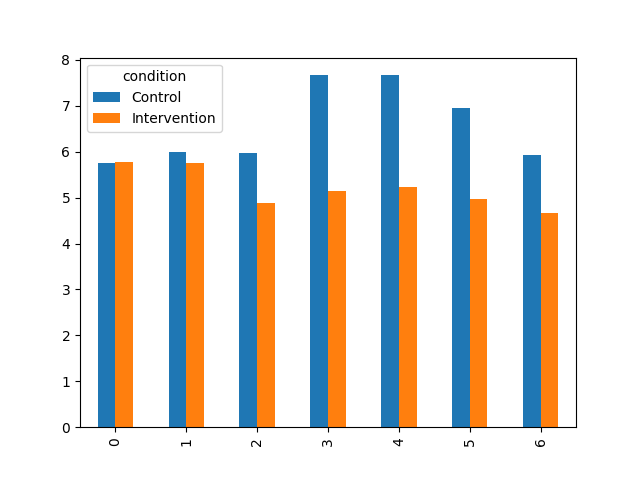

In [13]:
ax = data_mean.T.plot(kind='bar') # plot type

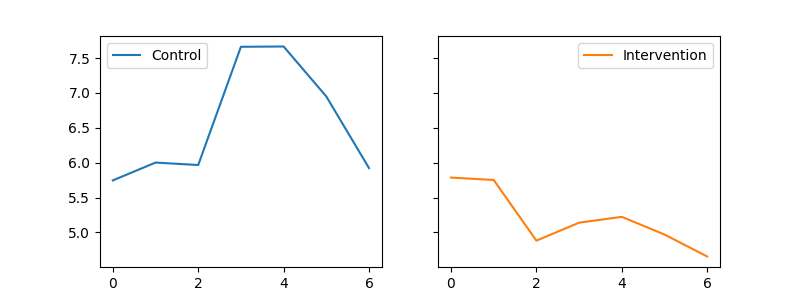

In [14]:
axs = data_mean.T.plot(figsize=(8, 3), subplots=True, layout=(1,2), sharey=True) 
# Each column is plotted as a separate subplot, 'layout' specifies the plot layout (number of rows/columns)

### **Collection of useful links**: Relevant functions of Matplotlib

* Matplotlib Sample Plots: 
    * https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py
    * https://matplotlib.org/gallery/index.html
* Artists: https://matplotlib.org/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py
    * Annotations: https://matplotlib.org/tutorials/text/annotations.html#sphx-glr-tutorials-text-annotations-py
    * Text: https://matplotlib.org/tutorials/text/text_intro.html#sphx-glr-tutorials-text-text-intro-py
* Legends: https://matplotlib.org/tutorials/intermediate/legend_guide.html#sphx-glr-tutorials-intermediate-legend-guide-py

In [15]:
plt.close('all')

### **Example**: Change / Extension of existing plots

Plots of functions from libraries (i.e. functions that return an axes object or to which you pass an axes object that is then plotted into) can be flexibly extended and modified - just like self-generated plots.

In [16]:
import biopsykit.signals.ecg as ecg
from biopsykit.protocols import CFT

plt.rcParams['timezone'] = "Europe/Berlin" # Specification of the time zone in the Matplotlib settings, if plots with date-time axes are plotted
cft = CFT()
# Loading the data to be plotted
hr_dict = ecg.io.load_hr_subject_dict("data/hr_sample_mist.xlsx")
df_hr = hr_dict['MIST3']

# Calculating CFT parameters (more on this in the next video):
params = cft.compute_cft_parameter(df_hr, return_dict=True)
params

AttributeError: module 'biopsykit.signals.ecg' has no attribute 'io'

In [ ]:
fig, ax = cft.cft_plot(data=df_hr, figsize=(10,5))

#### Creating the basic plot manually

CFT data consists of 3 phases:
* Baseline (0s - 60s).
* Cold Face Test Intervention (60s - 180s)
* Recovery (180s - 240s)


At first the index is converted from absolute time (`datetime`) into relative time (start of plot: `0 s`).
Since the dataset is longer than 240s ( at 240s the stress test starts ) the rest is cut off.

In [ ]:
df_cft = df_hr.copy()
df_cft.index = (df_hr.index - df_hr.index[0]).total_seconds()

# Start and end times of CFT phases
plot_start = 0
cft_start = 60
cft_end = 180
plot_end = 240
df_cft = df_cft.loc[plot_start:plot_end]

df_cft.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_cft, color="#8D1429", lw=1.5)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Heart Rate [bpm]")
ax.tick_params(left=True, bottom=True)
ax.margins(x=0, y=0.1)
fig.tight_layout()

#### Implementation of individual extensions

Plot parameters:
* `ls` = linestyle
* `lw` = linewidth
* `alpha` = transparency
* `ha` = horizontal alignment
* `va` = vertical alignment
* `s` = text

**Marking the individual phases using 'axvspan' (background) and 'text' (label)**

More on plot coordinates and axis transformations: https://matplotlib.org/3.1.1/tutorials/advanced/transforms_tutorial.html

In [ ]:
ax.axvspan(xmin=plot_start, xmax=cft_start, color='#e0e0e0', alpha=0.5) # Baseline
ax.axvspan(xmin=cft_start, xmax=cft_end, color='#9e9e9e', alpha=0.5) # CFT
ax.axvspan(xmin=cft_end, xmax=plot_end, color='#757575', alpha=0.5) # Recovery

In [ ]:
ax.text(
    x=plot_start + 0.5 * (cft_start - plot_start), y=0.95, 
    transform=ax.get_xaxis_transform(), s="Baseline", ha='center', va='center', fontsize=14
)
ax.text(
    x=cft_start + 0.5 * (cft_end - cft_start), y=0.95, 
    transform=ax.get_xaxis_transform(), s="CFT", ha='center', va='center', fontsize=14
)
ax.text(
    x=cft_end + 0.5 * (plot_end - cft_end), y=0.95, 
    transform=ax.get_xaxis_transform(), s="Recovery", ha='center', va='center', fontsize=14
);

**Baseline heart rate**  
Horizontal line (`ax.hlines()` from `plot_start` to `cft_end`)

In [ ]:
ax.hlines(y=params['baseline_hr'], xmin=plot_start, xmax=cft_end, ls='--', lw=2, alpha=0.6, color='#98a4ae');

**Peak Bradycardia** (lowest heart rate)  
* Vertical line at time point $x_{peak}$
* Marker at location $(x_{peak}, y_{peak})$

In [ ]:
x_peak_idx = params['cft_start_idx'] + params['peak_brady_idx']
# Vertical line
ax.axvline(x=df_cft.index[x_peak_idx], ls='--', lw=2, alpha=0.6, color='#003865');

In [ ]:
# Marker at one point
ax.plot(df_cft.index[x_peak_idx], df_cft.iloc[x_peak_idx], color='#003865', marker='o', markersize=7);

In [ ]:
# Many, many more extension possibilities...

### Exporting plots

Exporting plots as a file: `Figure.savefig(<filename>)`  
Important parameters:
* `format`: file format:
    * Pixel graphic: png, jpeg (specification of `dpi` controls the resolution)
    * vector graphic (recommended, because vector graphics do not pixelate when zooming in and they can also be embedded well in latex documents): `pdf`, `svg`. Recommended: `pdf`  
    => if not specified, file format is derived from the file name
* `dpi`: resolution of the exported graphic (for pixel graphics)
* `transparent`: `True` if white figure background should be exported as transparent, `False` if background should be white
* ...

In [ ]:
fig.savefig("img/cft_test.pdf", format='pdf', transparent=True)
fig.savefig("img/cft_test.png", format='png', transparent=True, dpi=300)

## Seaborn

Seaborn (https://seaborn.pydata.org/): Python visualization library built on Matplotlib. Seaborn provides many *high-level* plotting functions that wrap the *low-level* functions of Matplotlib, and is especially useful for visualizing statistical data.

Import: `import seaborn as sns`

Seaborn offers various plot functions for different data types:
* relations of data: `sns.relplot()` (`scatterplot`, `lineplot`, ...)
* distributions of data: `sns.distplot()` (`histplot`, `kdeplot`, `rugplot`, ...)
* categories of data: `sns.catplot()` (`barplot`, `swarmplot`, `boxplot`, `violinplot`, ...)

### Seaborn styles and context

Seaborn offers many functions to change the appearance of a plot quickly and easily (https://seaborn.pydata.org/tutorial/aesthetics.html):
* Context: controls line width, text size, etc.  
    Predefined contexts: `notebook` (default), `paper`, `talk`, `poster`  
    => Ideal to quickly create differently scaled plots for papers and presentations
* Style:  
    Predefined styles: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`  
    => Abstracts various style aesthetics (ticks, font, grid, etc.) that otherwise have to be  added "manually" to each plot in Matplotlib (or defined in the Matplotlib configuration)
* Color palette:
    Predefined color palettes and functions to create color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
sns.set_theme(context='notebook', style='ticks')
# One of the predefined color palettes
# palette = sns.color_palette("Paired")
# Alternative: Creating a color palette with FAU-blue as the base color and other, lighter color shades.
# Attention: This palette is ordered from "light" to "dark" => reversing the order so that FAU-blue is the first color
palette = sns.color_palette("light:#003865", n_colors=4)[::-1]

# Setting the palette
sns.set_palette(palette)
# Displaying the palette colors
sns.color_palette(palette)

<div class="alert alert-block alert-info">
    <b>Note:</b> Setting context, style or other parameters using Seaborn or Matplotlib affects <b>all</b> plots in the notebook, also those already created, as soon as they are updated!
</div>

Example from the beginning:

In [ ]:
fig, ax = plt.subplots() # Creating a figure object and associated axes
ax.plot(x, y)
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_title("Simple plot - Seaborn style")
fig.tight_layout()

### Data format

(Almost) all Seaborn functions work best with pandas dataframes in *long format*. This allows to specify individual index columns in order to generate different plots between groups, time points, variables, etc.

Loading the sample cortisol data and calculating standard features

In [ ]:
data = bp.example_data.get_saliva_example()
data_features = bp.saliva.standard_features(data)
data_features.head()

Converting the two dataframes to *long format*

In [ ]:
data_long = pd.wide_to_long(
    data_features.reset_index(), 
    stubnames="cortisol", 
    sep='_', 
    i=['subject', 'condition'], 
    j='feature', 
    suffix=r"\w+"
)
display(data.head())
display(data_long.head())

### Relations of data

#### Lineplot

https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot

Plotting the mean cortisol trend ± 95% CI as an error band

In [ ]:
data

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=data.reset_index(), x='sample', y='cortisol', ax=ax)
fig.tight_layout()

Standard deviation instead of 95% CI as an error band: `ci='sd'`, disabling the error band: `ci=None`

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=data.reset_index(), x='sample', y='cortisol', ax=ax, ci='sd')
fig.tight_layout()

Both groups plotted separately: `hue` parameter (different colors) (alternatively: `style` parameter for different styles or `hue` *and* `style` for combination)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=data.reset_index(), x='sample', y='cortisol', hue='condition', ax=ax)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=data.reset_index(), x='sample', y='cortisol', hue='condition', style='condition', ax=ax)
ax.set_ylabel(r"Cortisol $\left[\frac{nmol}{l}\right]$")
fig.tight_layout()

Both groups in separate subplots: figure-level function `sns.relplot(kind='line')` with parameter `col`

Difference figure-level vs. axes-level functions: https://seaborn.pydata.org/tutorial/function_overview.html#figure-level-vs-axes-level-functions

<div class="alert alert-block alert-info">
    <b>Note:</b> <code>sns.relplot()</code> is a <i>figure-level</i> function and therefore returns an object of type <code>seaborn.FacetGrid</code>.
</div>

In [ ]:
g = sns.relplot(data=data.reset_index(), x='sample', y='cortisol', col='condition', kind='line')
g.fig.tight_layout()

#### Scatterplot

https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data=data_features.reset_index(), x='cortisol_mean', y='cortisol_std', hue='condition', ax=ax)
fig.tight_layout()

### Verteilungen von Daten

Verteilung des Ortes des Cortisol-Maximums, aufgeteilt auf die beiden Gruppen

#### Histogramm

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=data_features.reset_index(), x='cortisol_argmax', hue='condition', ax=ax)
fig.tight_layout()

Verteilung der Herzrate in einem Zeitintervall

In [ ]:
df_hr = pd.read_excel("data/hr_sample_mist.xlsx", sheet_name=1, index_col='time')
df_hr.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df_hr, x='ECG_Rate', ax=ax)
fig.tight_layout()

Feste Größe an Behältern (z.B. 10)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df_hr, x='ECG_Rate', bins=10, ax=ax)
fig.tight_layout()

Kumulative Häufigkeit

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df_hr, x='ECG_Rate', cumulative=True, ax=ax)
fig.tight_layout()

y-Achse: Wahrscheinlichkeit des Behälters (statt absoluter Anzahl)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df_hr, x='ECG_Rate', stat='probability', ax=ax)
fig.tight_layout()

#### Kernel Density Estimation (KDE)

Histogramm + KDE-Plot (KDE = Schätzung der den Daten zugrundeliegenden Wahrscheinlichkeitsdichteverteilung)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df_hr, x='ECG_Rate', stat='probability', alpha=0.5, ax=ax)
sns.kdeplot(data=df_hr, x='ECG_Rate', ax=ax)
fig.tight_layout()

Generieren einer willkürlichen Gruppe (Gruppe 0 = Daten von Minute 0 bis Minute 3, Gruppe 1 = Daten von Minute 3 bis Ende) zur Illustration:

In [ ]:
df_hr['group'] = df_hr.index.isin(df_hr.first("3min").index).astype(int)

Plotten zweier Histogramme + KDE

In [ ]:
df_hr

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df_hr, x='ECG_Rate', stat='probability', hue='group', alpha=0.5, ax=ax)
sns.kdeplot(data=df_hr, x='ECG_Rate', hue='group', ax=ax)
fig.tight_layout()

### Kategorien von Daten

#### Barplot

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=data_features.reset_index(), x='condition', y='cortisol_mean', ax=ax, order=['Control', 'Intervention'])
fig.tight_layout()

#### Boxplot

Bedeutung der einzelnen Boxplot-Komponenten:

In [ ]:
from IPython.display import Image
Image("img/img_boxplot_explanation.jpg")

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=data_features.reset_index(), x='condition', y='cortisol_mean', ax=ax)
fig.tight_layout()

Boxplots können auch mit Notch (Parameter `notch=True`) geplottet werden. Der Notch kennzeichnet das **95%-CI des Medians** und kann daher als schnelle Orientierungshilfe herangezogen werden, ob ein signifikanter Unterschied vorliegen **könnte**:
* Überlappen sich die Notches der beiden Gruppen **nicht**, so **kann** der Gruppenunterschied signifikant sein: "If two boxes' notches do not overlap there is ‘strong evidence’ (95% confidence) their medians differ"
* Überlappen sie sich, ist der Unterschied auf alle Fälle **nicht** signifikant.

=> Boxplot mit Notches sehen allerdings nicht so schön aus (v.a., wenn das 95%-CI größer ist als die IQR) und sollten daher nur für eine kurze visuelle Inspektion der Ergebnisse aktiviert werden und nicht in den *finalen* Plots.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=data_features.reset_index(), x='condition', y='cortisol_argmax', notch=True, ax=ax)
fig.tight_layout()

Daten im Long-Format: *x-Achse* ist das berechnete Feature, *y-Achse* der Wert des jeweiligen Features, *hue* die Gruppenzugehörigkeit

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=data_long.reset_index(), x='feature', y='cortisol', hue='condition', notch=True, ax=ax)
fig.tight_layout()

Festlegen der Reihenfolge der Bedingungen `hue_order`

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=data_long.reset_index(), x='feature', y='cortisol', hue='condition', hue_order=['Control', 'Intervention'], notch=True, ax=ax)
fig.tight_layout()

Boxplots ausgewählter Features in eigenen Subplots

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 5))
sns.boxplot(data=data_features.reset_index(), x='condition', y='cortisol_argmax', ax=axs[0])
sns.boxplot(data=data_features.reset_index(), x='condition', y='cortisol_mean', ax=axs[1])
sns.boxplot(data=data_features.reset_index(), x='condition', y='cortisol_std', ax=axs[2])

axs[0].set_ylabel(r"$argmax_{Cortisol}~[AU]$")
axs[1].set_ylabel(r"$Cortisol~[nmol/l]$")
fig.tight_layout()

### Violin-Plot

Mischung aus Boxplot und Density-Plot

In [ ]:
df_hr

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(data=df_hr, x='group', y='ECG_Rate', ax=ax)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(data=data_long.reset_index(), x='feature', y='cortisol', hue='condition', ax=ax)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(data=data_long.reset_index(), x='feature', y='cortisol', hue='condition', split=True, inner='quartile', ax=ax)
fig.tight_layout()